### Unidad I. Variables, distribuciones y pruebas de hipótesis. 

## Análisis descriptivo de datos. 

- [Características numéricas de las variables aleatorias.](#Estadísticos-de-resumen)
- [Concepto de muestra](#Muestra-estadística)
- Estimación estadística de los parámetros de una distribución a partir de los datos de una muestra

La [estadística descriptiva](https://en.wikipedia.org/wiki/Descriptive_statistics) tiene más que ver con describir una muestra de manera cualitativa (gráfica) o cuantitativa (numérica) que con inferir propiedades acerca de la población de la cual proviene esa muestra ([estadística inferencial](https://en.wikipedia.org/wiki/Statistical_inference)).  

La estadística descriptiva está fuertemente ligada al [análisis exploratorio de datos](https://en.wikipedia.org/wiki/Exploratory_data_analysis) (*EDA* for *Exploratory Data Analysis*) y al [análisis inicial de datos](https://en.wikipedia.org/wiki/Data_analysis#Initial_data_analysis) (*IDA* por *Initial Data Analysis*). El primero focaliza en explorar los datos en busca de nuevas hipótesis, las cuales pueden terminar en nuevos muestreos y experimentos, mientras el segundo se focaliza en asegurar la calidad de los datos, chequear las asunciones y realizar las transformaciones necesarias para testear la hipótesis que teníamos en mente a la hora de recolectar los datos.

El análisis inicial de datos no es necesario solamente para el testeo de hipótesis de la estadística inferencial, sino también como un paso previo para el [aprendizaje automático](https://en.wikipedia.org/wiki/Machine_learning) (*ML* por *Machine Learning*) y forma parte importante de las primeras fases de la [minería de datos](https://en.wikipedia.org/wiki/Data_mining) (*Data mining*).

### Muestra estadística

Se denomina <a href="https://en.wikipedia.org/wiki/Sample_(statistics)">muestra</a> a un subconjunto de datos tomados o seleccionados de una [población estadística](https://en.wikipedia.org/wiki/Statistical_population) mediante un <a href="https://en.wikipedia.org/wiki/Sampling_(statistics)">proceso de muestreo</a> determinado. Cada una de las [unidades muestrales](https://en.wikipedia.org/wiki/Statistical_unit) suele llamarse observación, y es posible medir variables aleatorias para cada una de ellas.

Las **muestras** pueden ser:  
- **Completas**: Incluye a todos los casos, individuos u objetos de la población que cumplen con un criterio (de selección) determinado. Generalmente es difícil o imposible disponer de muestras completas.  
- **Representativas** (*representative or unbiased*): Un conjunto de unidades muestrales seleccionados de una muestra completa usando un proceso de selección/muestreo que no depende de las propiedades de estas unidades. Una manera de obtener muestras no sesgadas es seleccionando una **muestra aleatoria** (*random/probability sample*).  

#### Técnicas de muestreo

##### Muestreo aleatorio simple

En el [muestreo aleatorio simple](https://en.wikipedia.org/wiki/Simple_random_sample) se selecciona un número k de unidades muestrales de manera aleatoria, teniendo cada elemento de la población la misma probabilidad de ser seleccionado. El muestreo puede ser **con o sin reposición** (*with or without replacement*). Si el muestreo se efectúa con reposición, cada elemento de la población puede ser seleccionado más de una vez. En el muestreo aleatorio sin reposición, donde los elementos no son devueltos a la población y no pueden ser elegidos más de una vez, la probabilidad de sacar un determinado elemento cambia con la extracción del anterior (no son independientes). Sin embargo el muestreo aleatorio simple sin reposición satisface [intercambiabilidad](https://en.wikipedia.org/wiki/Exchangeable_random_variables), es que cualquier orden de los elementos extraídos es igualmente probable. Si el tamaño de la población es mucho más grande que el tamaño de la muestra, el muestreo aleatorio simple sin reposición se aproxima a un muestreo simple con reposición, dada la baja probabilidad de elegir un mismo elemento dos veces.

La manera más sencilla de hacer un muestreo aleatorio simple con o sin reposición en **Julia**, es usando la función `sample` de **StatsBase**. Ésta es similar a la función `sample` de **R**. Ambas toman una lista de valores, el tamaño de la muestra a tomar (`size`) y se les debe indicar si queremos que sea con o sin reemplazo (`replace`). Una diferencia entre ambas funciones es que mientras R por defecto hace el muestreo sin reemplazo, Julia lo hace con reemplazo si no le indicamos lo contrario.

In [1]:
individuos = 1:10

1:10

In [2]:
using StatsBase

sample(individuos, 5, replace=true)

5-element Array{Int64,1}:
 1
 2
 1
 2
 1

In [3]:
using RCall

R"sample($individuos, size=5, replace=TRUE)"

RCall.RObject{RCall.IntSxp}
[1] 9 6 9 7 8


##### Muestreo sistemático

El [muestreo sistemático](https://en.wikipedia.org/wiki/Systematic_sampling) consiste en ordenar los elementos de una población según alguna variable de interés, para luego tomar *n* unidades muestrales equiespaciadas. El primer elemento debe ser seleccionado al azar, quedando los otros determinados en relación a este. Una ventaja de este tipo de muestreo es que permite muestrear una variable de intereses en todo su rango. Pero debe tenerse cuidado si la variable muestra alguna característica periódica, dado que puede generarse una muestra sesgada de la población. Además debe tenerse en cuenta que no se verá la variación entre dos elementos contiguos en la lista, dado que nunca son seleccionados a la vez.

Por ejemplo, si queremos hacer un muestreo sistemático de las plantas del [conjunto de datos iris](https://es.wikipedia.org/wiki/Iris_flor_conjunto_de_datos) según largo de sus pétalos:  

In [4]:
using RDatasets
iris = dataset("datasets","iris")
head(iris)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [5]:
sort!(iris, cols=:PetalLength) # Ordena la variable de interés
head(iris)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,4.6,3.6,1.0,0.2,setosa
2,4.3,3.0,1.1,0.1,setosa
3,5.8,4.0,1.2,0.2,setosa
4,5.0,3.2,1.2,0.2,setosa
5,4.7,3.2,1.3,0.2,setosa
6,5.4,3.9,1.3,0.4,setosa


In [6]:
N = nrow(iris) # Número de elementos en mi población

150

In [7]:
n = 7 # Número de muestras

7

In [8]:
@assert n != 0 "El tamaño de la muestra no puede ser 0"

@assert n <= N "La muestra no puede ser superior en tamaño a la población"

k = div(N,n) # Intervalo de muestreo (sampling interval or skip)

21

In [9]:
primero = sample(1:k) # Elijo al azar (con igual probabilidad) un elemento de 1 a k para comenzar 

17

In [10]:
# Selecciono los elementos restante a k pasos del primero
índices = Int[ primero + ((muestra-1) * k) for muestra in 1:n ]

7-element Array{Int64,1}:
  17
  38
  59
  80
 101
 122
 143

In [11]:
iris[índices,:]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,4.8,3.0,1.4,0.1,setosa
2,4.8,3.4,1.6,0.2,setosa
3,5.2,2.7,3.9,1.4,versicolor
4,6.4,3.2,4.5,1.5,versicolor
5,6.3,2.5,4.9,1.5,versicolor
6,6.2,3.4,5.4,2.3,virginica
7,7.4,2.8,6.1,1.9,virginica


##### Muestreo estratificado

En el [muestreo estratificado](https://en.wikipedia.org/wiki/Stratified_sampling), se estratifica la población antes de tomar las muestras. En este proceso se divide a los miembros de la población en estratos, grupos o subpoblaciones homogéneas. Estos estratos deben ser mutuamente excluyentes, dado que un miembro de la población no podrá pertenecer a más de una subpoblación. Todos los miembros de la población deben pertenecer a un estrato determinado, no pueden quedar miembros sin clasificar (estratificación exhaustiva). Una vez que se estratifico la población, se realizar un muestreo aleatorio simple o sistemático  dentro de cada estrato.

Existen tres posibles estrategias:  
- **Asignación proporcional**: El número de unidades muestrales de cada estrato es proporcional al número de individuos del estrato dentro de la población. Es decir, se respeta las proporciones de los estratos en la población.  
- **Asignación óptima**: El número de muestras seleccionadas para cada estrato es proporcional a la desviación estándar de la variable de interés en cada estrato. Ésto requiere un conocimiento previo de la población.  
- **Asignación uniforme**: Se selecciona un igual número de elementos para cada estrato. Ésto permite, cuando el tamaño de los estratos varía en la población, equiparar el poder de los test utilizados en cada estratos a la hora de compararlos. El conjunto de datos *iris* fue generado en un muestreo estratificado uniforme (50 flores de cada especie), en el que cada especie conforma un estrato.  

###### Media

$$ \mu_{s} = \frac{1}{N} \sum_{h=1}^{L} N_{h} \mu_{h} $$

In [12]:
μₛ = mean(iris[:PetalLength])

3.7580000000000005

In [13]:
estratos = by(iris, :Species) do df 
    DataFrame(
    μₕ = mean(df[:PetalLength]),
    Nₕ = nrow(df)
    )
end

,Species,μₕ,Nₕ
1,setosa,1.462,50
2,versicolor,4.26,50
3,virginica,5.552,50


In [14]:
N = nrow(iris)

150

In [15]:
(1/N) * sum(estratos[:μₕ] .* estratos[:Nₕ])

3.7580000000000005

### Estadísticos de resumen

Los [estadísticos de resumen](https://en.wikipedia.org/wiki/Summary_statistics) (*Summary statistics*) describen de manera cuantitativa la distribución de una muestra. Normalmente se obtiene un conjunto de estadísticos que describen cada variable aleatoria/dimensión de los datos de manera independiente (si excluimos medidas de dependencia como las correlaciones).  

Existen **estadísticos de**: 
- tendencia central (*location or central tendency*)
- dispersión (*spread or dispersion*)
- forma (*shape*):
 - asimetría (*Skewness*)
 - apuntamiento (*Kurtosis*)

Estos estadísticos pueden ser [robustos](https://en.wikipedia.org/wiki/Robust_statistics) o no, llamándose robustos a los estadísticos menos afectados por [valores atípicos](https://en.wikipedia.org/wiki/Outlier) (*outliers*). Estos estadísticos describen la muestra de una manera más robusta cuando su distribución se aleja de una distribución normal (por ejemplo, si la distribución es asimétrica). 

#### Estadísticos de tendencia central

In [16]:
for (nombre, valores) in eachcol(iris)
    println(nombre)
    
    if eltype(valores) <: Real
        println("  Media   : ", mean(valores))
        println("  Mediana : ", median(valores))
        println("  Moda    : ", mode(valores))
    else
        println("  Moda    : ", mode(valores))
    end 
    
end

SepalLength
  Media   : 5.843333333333334
  Mediana : 5.8
  Moda    : 5.0
SepalWidth
  Media   : 3.0573333333333332
  Mediana : 3.0
  Moda    : 3.0
PetalLength
  Media   : 3.7580000000000005
  Mediana : 4.35
  Moda    : 1.4
PetalWidth
  Media   : 1.1993333333333331
  Mediana : 1.3
  Moda    : 0.2
Species
  Moda    : setosa


#### Estadísticos de dispersión

In [17]:
for (nombre, valores) in eachcol(iris)
    if eltype(valores) <: Real
        
        println(nombre)
        
        println("  Desviación estándar   : ", std(valores))
        println("  Varianza              : ", var(valores))
        println("  Rango intercuartílico : ", iqr(valores))
        
    end
end

SepalLength
  Desviación estándar   : 0.828066127977863
  Varianza              : 0.6856935123042507
  Rango intercuartílico : 1.3000000000000007
SepalWidth
  Desviación estándar   : 0.4358662849366982
  Varianza              : 0.18997941834451898
  Rango intercuartílico : 0.5
PetalLength
  Desviación estándar   : 1.7652982332594662
  Varianza              : 3.116277852348993
  Rango intercuartílico : 3.4999999999999996
PetalWidth
  Desviación estándar   : 0.7622376689603465
  Varianza              : 0.5810062639821029
  Rango intercuartílico : 1.5


#### Estadísticos de forma

In [18]:
for (nombre, valores) in eachcol(iris)
    if eltype(valores) <: Real
        
        println(nombre)
        
        println("  Skewness : ", skewness(valores))
        println("  Kurtosis : ", kurtosis(valores))
        
    end
end

SepalLength
  Skewness : 0.31175305850229645
  Kurtosis : -0.573567948924977
SepalWidth
  Skewness : 0.31576710633893856
  Kurtosis : 0.18097631752246546
PetalLength
  Skewness : -0.27212766645672154
  Kurtosis : -1.3955358863990097
PetalWidth
  Skewness : -0.10193420656559918
  Kurtosis : -1.3360674052315484


In [19]:
using Plots

In [38]:
columnas = [:SepalLength, :SepalWidth, :PetalLength, :PetalWidth]

4-element Array{Symbol,1}:
 :SepalLength
 :SepalWidth 
 :PetalLength
 :PetalWidth 

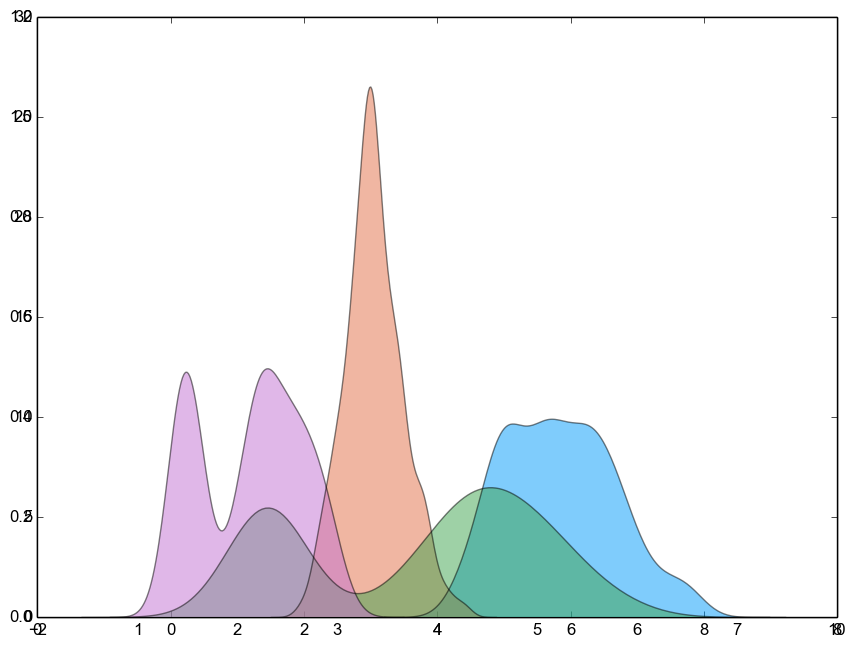


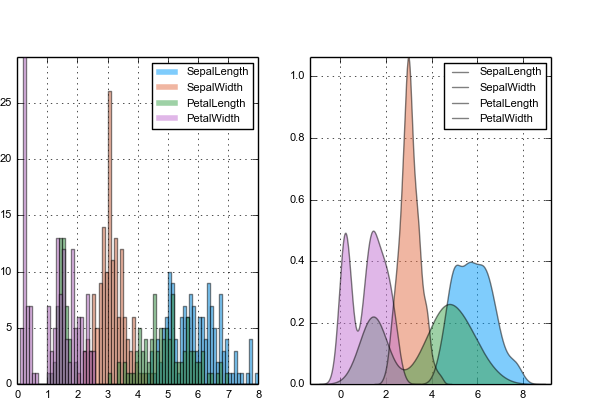

In [74]:
plot(
histogram(iris, columnas', bins=0:0.1:8, alpha=0.5, legend=true),
density(iris, columnas', alpha=0.5, legend=true, fill=0)
)